Import Libraries

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Load and Display Dataset

In [21]:
# Load the dataset
data = pd.read_csv("dataset.csv")

# Display the first few rows of the dataset
data.head()

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune


Handle Missing Values and Encode Categorical Variables

In [22]:
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoder_team = LabelEncoder()
label_encoder_winner = LabelEncoder()

data['team1'] = label_encoder_team.fit_transform(data['team1'])
data['team2'] = label_encoder_team.transform(data['team2'])  # Ensure consistent encoding
data['winner'] = label_encoder_winner.fit_transform(data['winner'])

Select Features and Target

In [23]:
# Select features and target
X = data[['team1', 'team2', 'team1_score', 'team2_score']]
y = data['winner']

Split Dataset into Training and Testing Sets

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and Train Random Forest Model

In [25]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make Predictions and Evaluate Model

In [26]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.40      0.67      0.50         3
           2       0.58      0.70      0.64        10
           3       1.00      0.12      0.22         8
           4       0.68      0.77      0.72        22
           5       0.69      0.45      0.55        20
           6       0.00      0.00      0.00         1
           7       0.79      0.79      0.79        24
           9       0.00      0.00      0.00         2
          10       0.71      1.00      0.83        10
          11       0.64      0.76      0.70        21
          12       0.72      1.00      0.84        13
          13       0.79      0.92      0.85        25
          14       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         4

    accuracy                           0.70       172
   macro av

c:\Users\Anurag Yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anurag Yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anurag Yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Plot Confusion Matrix

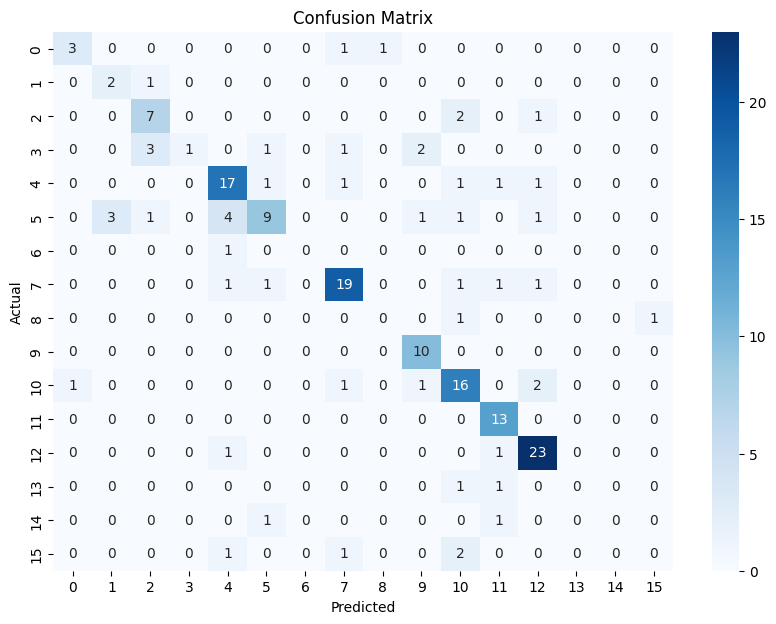

In [27]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Plot Distribution of Winners

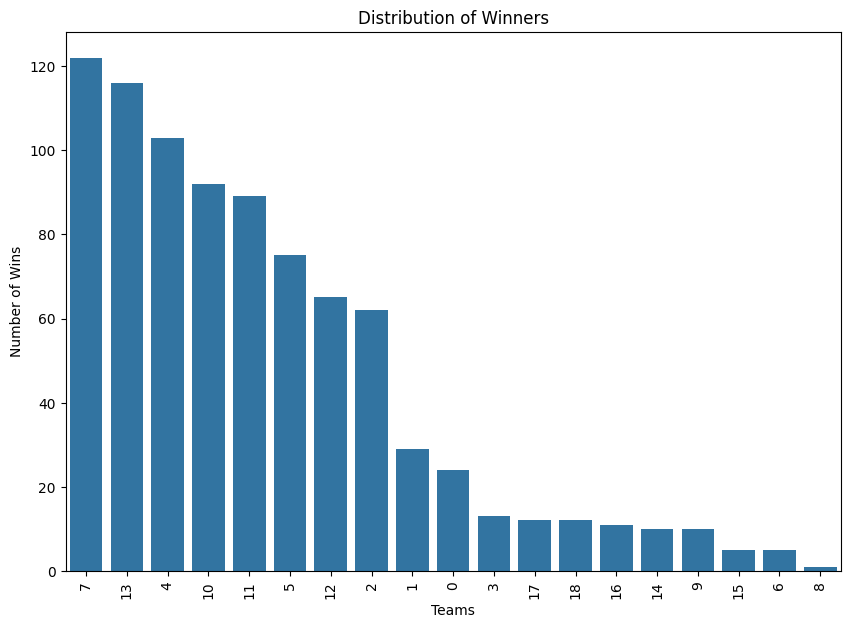

In [28]:
# Plot the distribution of winners
plt.figure(figsize=(10, 7))
sns.countplot(x='winner', data=data, order=data['winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Winners')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()


Plot Relationship between Scores and Winners

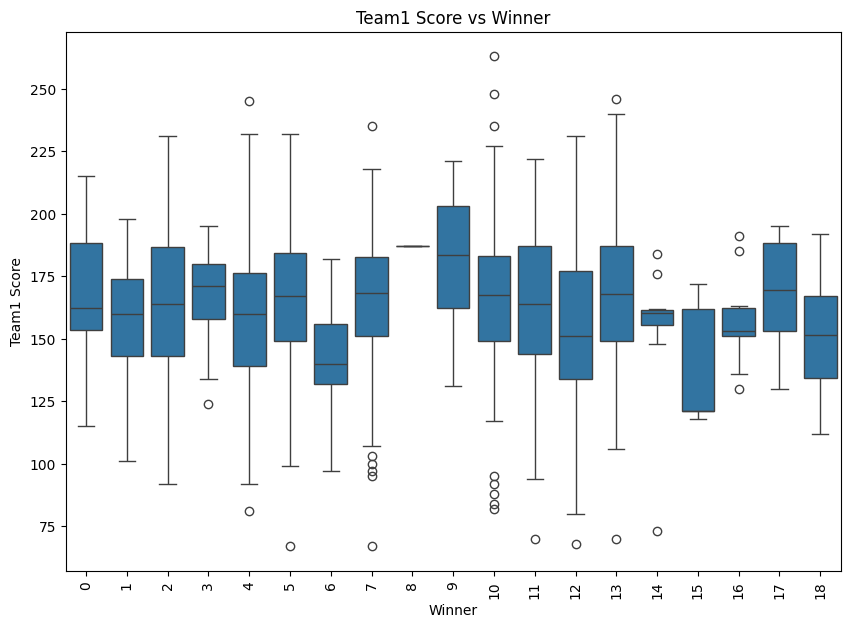

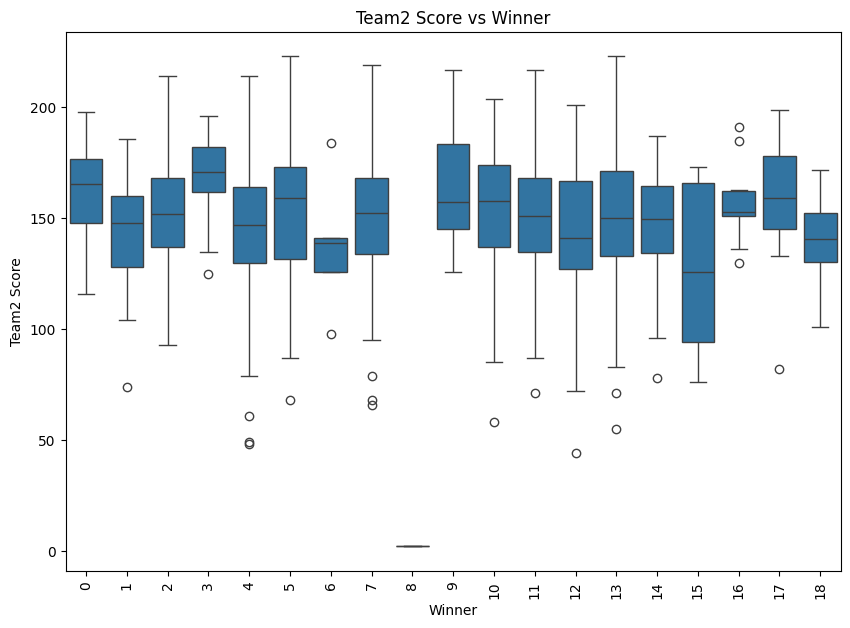

In [29]:
# Plot team1_score vs winner
plt.figure(figsize=(10, 7))
sns.boxplot(x='winner', y='team1_score', data=data)
plt.xticks(rotation=90)
plt.title('Team1 Score vs Winner')
plt.xlabel('Winner')
plt.ylabel('Team1 Score')
plt.show()

# Plot team2_score vs winner
plt.figure(figsize=(10, 7))
sns.boxplot(x='winner', y='team2_score', data=data)
plt.xticks(rotation=90)
plt.title('Team2 Score vs Winner')
plt.xlabel('Winner')
plt.ylabel('Team2 Score')
plt.show()


Additional Plots

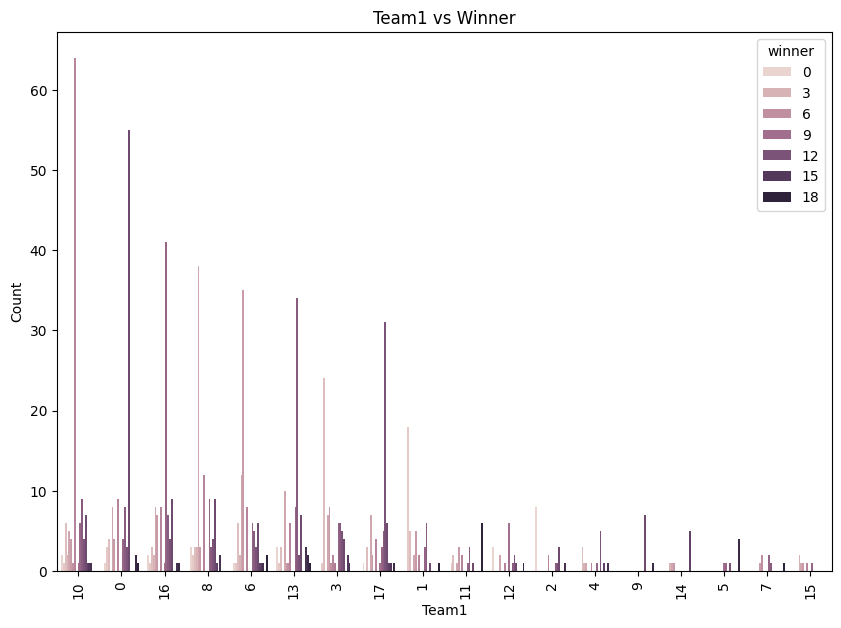

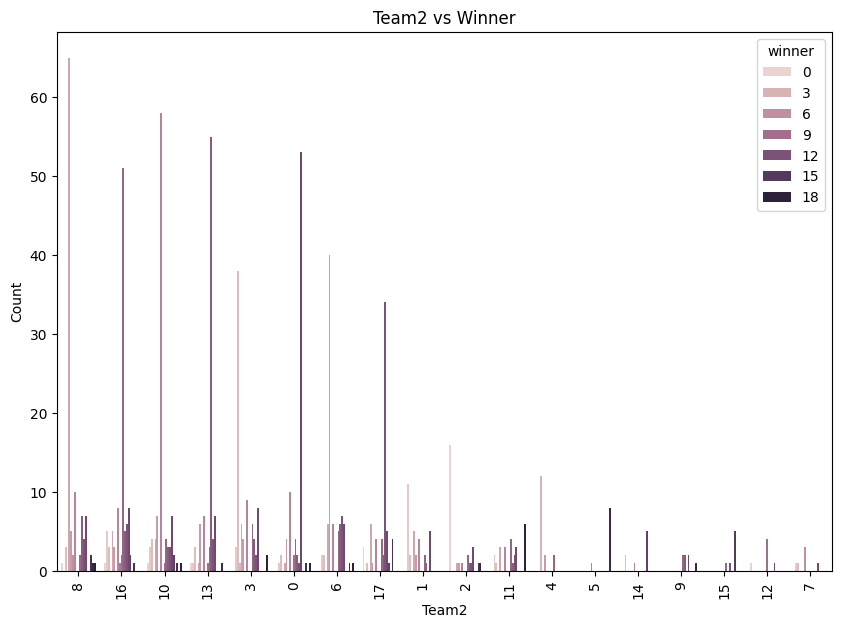

In [30]:
# Plot the relationship between team1, team2 and the winner
plt.figure(figsize=(10, 7))
sns.countplot(x='team1', hue='winner', data=data, order=data['team1'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Team1 vs Winner')
plt.xlabel('Team1')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 7))
sns.countplot(x='team2', hue='winner', data=data, order=data['team2'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Team2 vs Winner')
plt.xlabel('Team2')
plt.ylabel('Count')
plt.show()


Visualize Model Accuracy with Accuracy Score

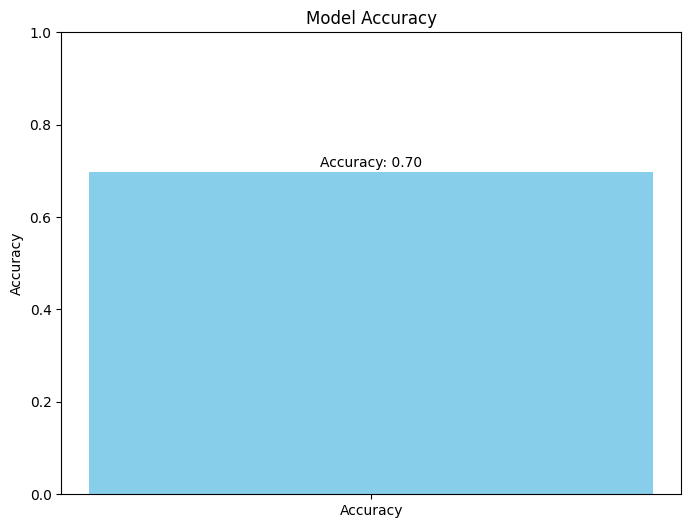

In [31]:
# Visualize model accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.text(0, accuracy + 0.01, f'Accuracy: {accuracy:.2f}', ha='center')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()